Naman Raiyani

60009220057

D2-1

IPCV Experiment 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [40]:
def add_gaussian_noise(image, mean=0, std_dev=75):
    row, column = image.shape
    gaussian_noise = np.random.normal(mean, std_dev, (row, column))
    noisy_image = np.clip(image + gaussian_noise, 0, 255)
    return noisy_image.astype(np.uint8)

In [41]:
import numpy as np
import random

def add_sal_and_pepper_noise(image):
    row, column = image.shape

    noisy_image = np.copy(image)

    number_of_salt_pixels = random.randint(30000, 800000)
    for _ in range(number_of_salt_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, column - 1)
        noisy_image[y_coord, x_coord] = 255

    number_of_pepper_pixels = random.randint(30000, 800000)
    for _ in range(number_of_pepper_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, column - 1)
        noisy_image[y_coord, x_coord] = 0

    return noisy_image

In [42]:
def avg_filtered_image(image):
    mask_size = 3
    mask = np.ones((mask_size, mask_size)) / (mask_size ** 2)
    row, column = image.shape
    mask_height, mask_width = mask.shape

    pad_height = mask_height // 2
    pad_width = mask_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    filtered_image = np.zeros((row, column), dtype=image.dtype)

    for i in range(row):
        for j in range(column):
            region = padded_image[i:i + mask_height, j:j + mask_width]
            filtered_image[i, j] = np.sum(region * mask)

    return filtered_image

In [43]:
def median_filter(image):
    row, column = image.shape
    mh, mw = 3, 3
    pad_h, pad_w = mh // 2, mw // 2

    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    new = np.zeros((row, column))

    for i in range(row):
        for j in range(column):
            region = padded_image[i:i + mh, j:j + mw]
            new[i, j] = np.median(region)

    return new

In [44]:
def display_three_images(original, noisy, filtered, title1, title2, title3):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.title(title1)
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(title2)
    plt.imshow(noisy, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(title3)
    plt.imshow(filtered, cmap='gray')
    plt.axis('off')

    plt.show()

In [45]:
image_path = '/content/drive/MyDrive/Colab Notebooks/IPCV/3.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [46]:
noisy_image_gaussian = add_gaussian_noise(original_image)
filtered_image_gaussian = avg_filtered_image(noisy_image_gaussian)

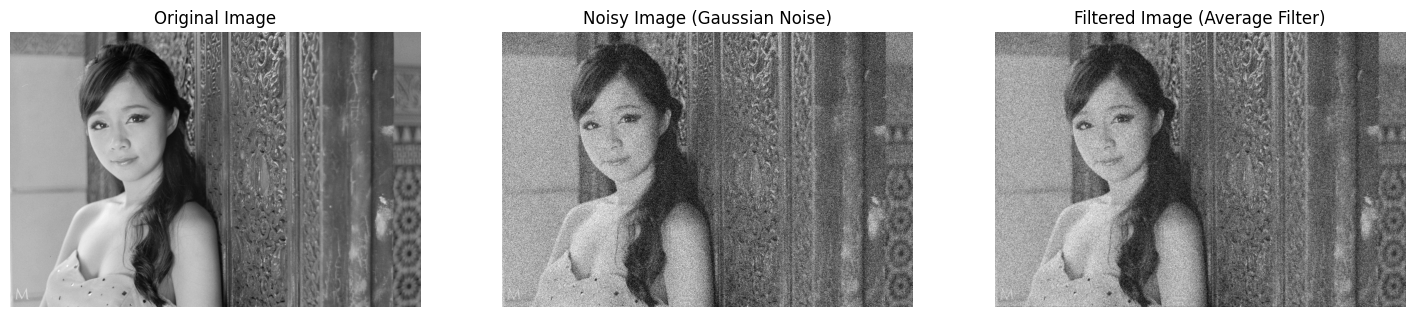

In [69]:
display_three_images(original_image, noisy_image_gaussian, filtered_image_gaussian,
                     'Original Image', 'Noisy Image (Gaussian Noise)', 'Filtered Image (Average Filter)')

In [48]:
noisy_image_salt_pepper  = add_sal_and_pepper_noise(original_image)
filtered_image_salt_pepper  = median_filter(noisy_image_salt_pepper)

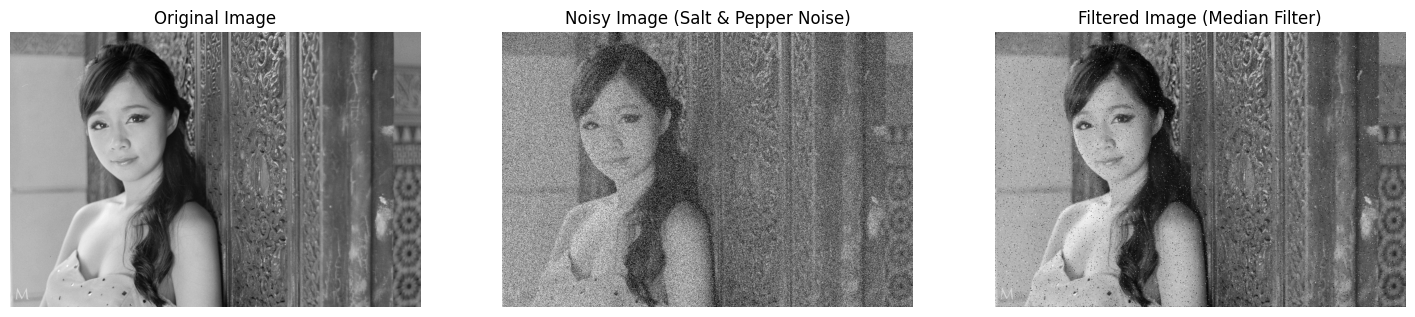

In [70]:
display_three_images(original_image, noisy_image_salt_pepper, filtered_image_salt_pepper,
                     'Original Image', 'Noisy Image (Salt & Pepper Noise)', 'Filtered Image (Median Filter)')

In [50]:
def add_gaussian_noise_colored(image, mean=0, std_dev=75):
    channels = cv2.split(image)
    noisy_channels = []

    for channel in channels:
        row, column = channel.shape
        gaussian_noise = np.random.normal(mean, std_dev, (row, column))
        noisy_channel = np.clip(channel + gaussian_noise, 0, 255)
        noisy_channels.append(noisy_channel.astype(np.uint8))

    noisy_image = cv2.merge(noisy_channels)
    return noisy_image

In [51]:
def avg_filtered_image_colored(image):
    channels = cv2.split(image)
    filtered_channels = []

    mask_size = 3
    mask = np.ones((mask_size, mask_size)) / (mask_size ** 2)

    for channel in channels:
        row, column = channel.shape
        mask_height, mask_width = mask.shape

        pad_height = mask_height // 2
        pad_width = mask_width // 2
        padded_image = np.pad(channel, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

        filtered_image = np.zeros((row, column), dtype=channel.dtype)

        for i in range(row):
            for j in range(column):
                region = padded_image[i:i + mask_height, j:j + mask_width]
                filtered_image[i, j] = np.sum(region * mask)

        filtered_channels.append(filtered_image)

    filtered_image_colored = cv2.merge(filtered_channels)
    return filtered_image_colored

In [52]:
def median_filter_colored(image):
    channels = cv2.split(image)
    filtered_channels = []

    mh, mw = 3, 3
    pad_h, pad_w = mh // 2, mw // 2

    for channel in channels:
        row, column = channel.shape
        padded_image = np.pad(channel, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

        new_channel = np.zeros((row, column))

        for i in range(row):
            for j in range(column):
                region = padded_image[i:i + mh, j:j + mw]
                new_channel[i, j] = np.median(region)

        filtered_channels.append(new_channel)

    filtered_image_colored = cv2.merge(filtered_channels)
    return filtered_image_colored

In [53]:
image_path_colored = '/content/drive/MyDrive/Colab Notebooks/IPCV/5.jpg'
original_image_colored = cv2.imread(image_path_colored)
original_image_colored = cv2.cvtColor(original_image_colored, cv2.COLOR_BGR2RGB)

In [54]:
noisy_image_gaussian_colored = add_gaussian_noise_colored(original_image_colored)
filtered_image_gaussian_colored = avg_filtered_image_colored(noisy_image_gaussian_colored)

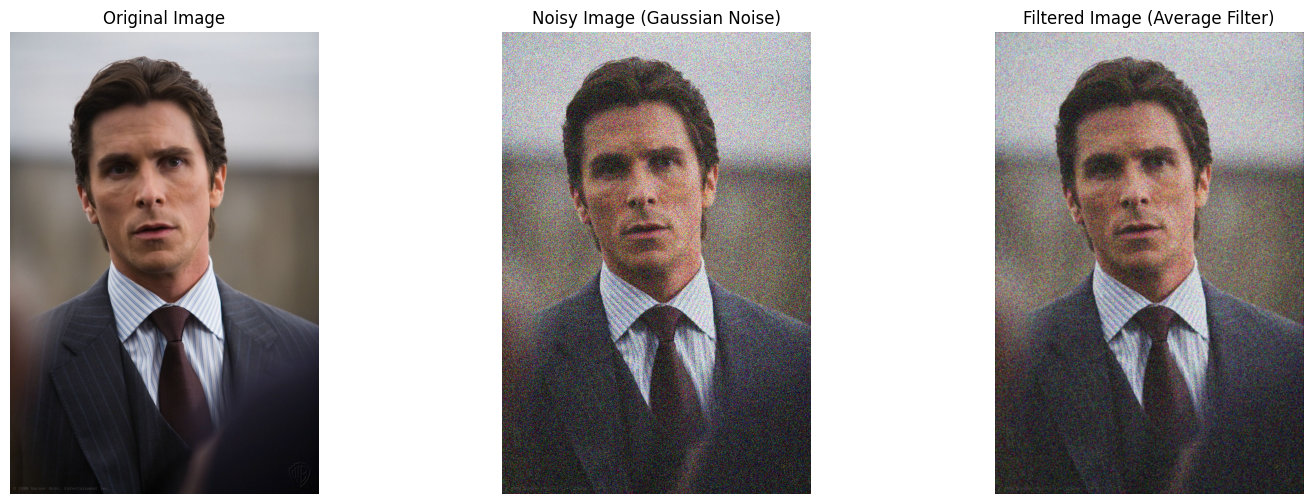

In [71]:
display_three_images(original_image_colored, noisy_image_gaussian_colored, filtered_image_gaussian_colored,
                     'Original Image', 'Noisy Image (Gaussian Noise)', 'Filtered Image (Average Filter)')

In [56]:
def add_sal_and_pepper_noise_colored(image):
    channels = cv2.split(image)
    noisy_channels = []

    for channel in channels:
        row, column = channel.shape
        noisy_channel = np.copy(channel)

        number_of_salt_pixels = random.randint(3000, 80000)
        for _ in range(number_of_salt_pixels):
            y_coord = random.randint(0, row - 1)
            x_coord = random.randint(0, column - 1)
            noisy_channel[y_coord, x_coord] = 255

        number_of_pepper_pixels = random.randint(3000, 80000)
        for _ in range(number_of_pepper_pixels):
            y_coord = random.randint(0, row - 1)
            x_coord = random.randint(0, column - 1)
            noisy_channel[y_coord, x_coord] = 0

        noisy_channels.append(noisy_channel)

    noisy_image = cv2.merge(noisy_channels)
    return noisy_image

In [66]:
def median_filter_colored(image):
    channels = cv2.split(image)
    filtered_channels = []
    mh, mw = 3, 3
    pad_h, pad_w = mh // 2, mw // 2

    for channel in channels:
        row, column = channel.shape
        padded_image = np.pad(channel, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
        new_channel = np.zeros((row, column), dtype=np.float32)

        for i in range(row):
            for j in range(column):
                region = padded_image[i:i + mh, j:j + mw]
                new_channel[i, j] = np.median(region)

        new_channel = np.clip(new_channel, 0, 255).astype(np.uint8)
        filtered_channels.append(new_channel)

    filtered_image_colored = cv2.merge(filtered_channels)
    return filtered_image_colored

In [67]:
noisy_image_salt_and_pepper_colored = add_sal_and_pepper_noise_colored(original_image_colored)
filtered_image_salt_and_pepper_colored = median_filter_colored(noisy_image_salt_and_pepper_colored)

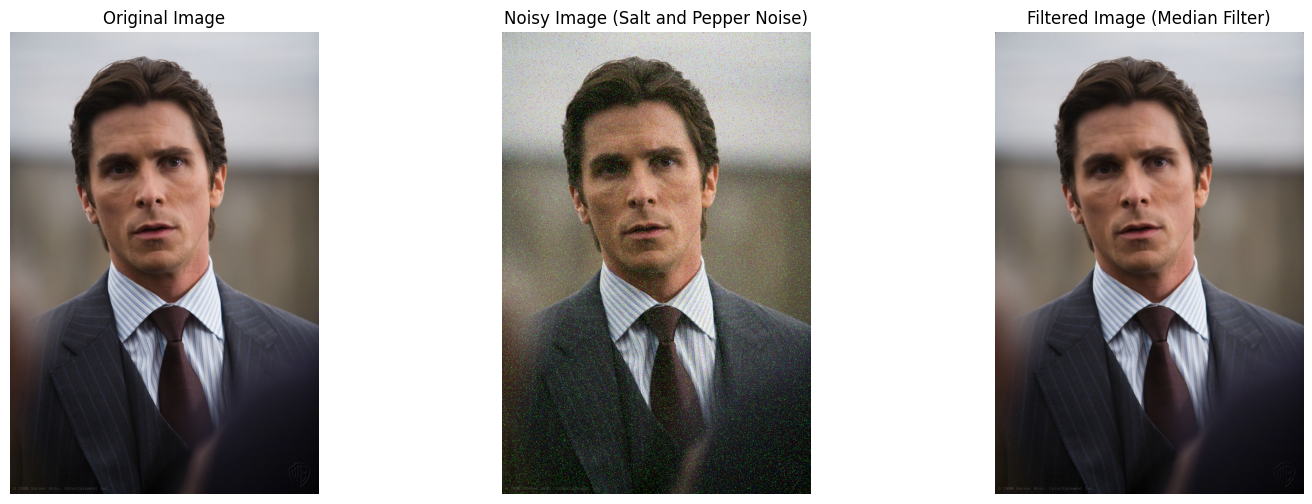

In [72]:
display_three_images(original_image_colored, noisy_image_salt_and_pepper_colored, filtered_image_salt_and_pepper_colored,
                     'Original Image', 'Noisy Image (Salt and Pepper Noise)', 'Filtered Image (Median Filter)')

Observation:

In this experiment, we explored the following aspects of image processing:

Adding Noise:

Gaussian Noise: The add_gaussian_noise function introduces Gaussian noise with a specified mean and standard deviation. Increasing the standard deviation (std_dev) results in more pronounced noise, affecting image clarity.
Salt and Pepper Noise: The add_sal_and_pepper_noise function simulates salt and pepper noise by randomly placing white and black pixels. The number of salt and pepper pixels can be adjusted to control the noise density.
Filtering Techniques:

Average Filtering: Using avg_filtered_image and avg_filtered_image_colored, the average filter smooths the image by averaging pixel values within a mask. The mask size (mask_size) determines the extent of smoothing, potentially leading to loss of fine details.
Median Filtering: The median_filter and median_filter_colored functions apply a median filter to remove noise while preserving edges. The filter size (mh, mw) affects how effectively the noise is removed and the preservation of image details.


Applications:

Medical Imaging: Noise reduction methods improve the accuracy of medical image analysis, such as detecting tumors or other anomalies.

Satellite Imagery: Enhancing images captured by satellites helps in better interpretation of geographical features and monitoring environmental changes.

Computer Vision: Preprocessing steps, including noise reduction, are critical for improving the performance of computer vision algorithms used in object detection and facial recognition.

Conclusion:

This experiment highlights essential image processing techniques for handling noise. By fine-tuning parameters such as noise level and filter size, we can effectively balance noise reduction with detail preservation. Mastery of these techniques is crucial for improving image quality and accuracy in various analytical applications.

